# Least square problem for polynomial regression 

## import library

In [1648]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

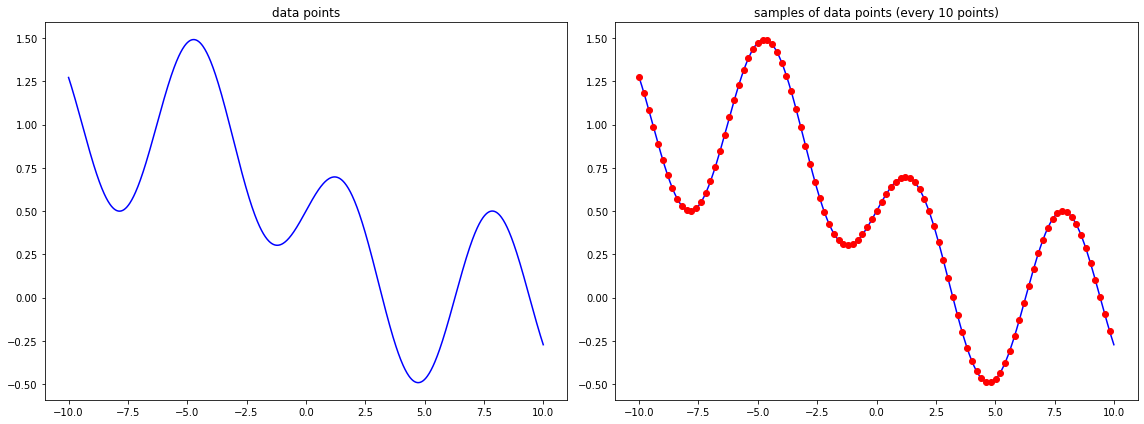

In [1649]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

x_sample    = x[::10]       
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

In [1650]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p])
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # A = np.ones(n*len(x))
    # A.shape=(len(x),n)
    # for i in range(len(A)):
    #     for j in range(len(A[1])-1):
    #         A[i][j+1] = x[i]**(j+1)
    
    # for i in range(p):
    #     A_row = []
    #     for j in range(len(A)-1):
    #         A_row.append(np.sum([x**(i+j) for x in x]))
    #     A = np.append(A, A_row)
    
    for i in range(n):
        for j in range(p):
            A[i,j] = np.sum(x**(i+j))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return A

## construct vector $b$

In [1651]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

#     b = b[:, None]
#     for i in range(len(y)-1):
#             b[i]=y[i+1]
    
    for i in range(n):
        b[i] = np.sum(x**(i)*y)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b

## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [1652]:
def solve_regression(x, y, p):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # At = construct_matrix_A(x,p).T
    # AtA1 = np.linalg.inv(np.dot(At,construct_matrix_A(x,p)))
    # z = np.dot(np.dot(AtA1,At),construct_vector_b(y))
    
    
    z = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(A),A)), np.transpose(A)), y)
    
    loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(x))
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [1653]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # At = construct_matrix_A(x,p).T
    # AtA1_naI = np.linalg.inv(np.matmul(At,construct_matrix_A(x,p)) + np.matmul(np.dot(len(y),alpha), np.identity))
    # z = np.matmul(np.matmul(AtA1_naI,At),construct_vector_b(y))
    
    
    A = [] 
    C = [] 
    lbda = len(x)*alpha
    for i in range(p): 
            A_row = [] 
            for j in range(p): 
                lbda = 0 if i != j else lbda
                A_row.append(np.sum([x**(i+j) + lbda for x in x]))
            A.append(A_row) 
            C.append(np.sum(np.multiply([x**i for x in x], y))) 
    z = np.linalg.inv(A) * np.transpose(C) 
    
    loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (alpha/2)*np.sum(z**2)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [1654]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # At = construct_matrix_A(x,p).T
    # AtA1 = np.linalg.inv(np.matmul(At,construct_matrix_A(x,p)))
    # z = np.dot(np.dot(AtA1,At),construct_vector_b(y))
    A = [] 
    C = [] 
    for i in range(p): 
            A_row = [] 
            for j in range(p): 
                A_row.append(np.sum([x**(i+j)]))
            A.append(A_row) 
            C.append(np.sum(np.multiply([x**i for x in x], y))) 
    z = np.linalg.inv(A) * np.transpose(C) 
    
    y_hat = np.dot(construct_matrix_A(x,p), np.argmin(construct_matrix_A(x,p)))
    loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y))
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [1655]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    # At = construct_matrix_A(x,p).T
    # AtA1_naI = np.linalg.inv(np.matmul(At,construct_matrix_A(x,p)) + np.matmul(np.dot(len(y),alpha), np.identity))
    # z = np.matmul(np.matmul(AtA1_naI,At),construct_vector_b(y))
    A = [] 
    C = [] 
    lbda = len(x)*alpha
    for i in range(p): 
            A_row = [] 
            for j in range(p): 
                lbda = 0 if i != j else lbda
                A_row.append(np.sum([x**(i+j) + lbda for x in x]))
            A.append(A_row) 
            C.append(np.sum(np.multiply([x**i for x in x], y))) 
    z = np.linalg.inv(A) * np.transpose(C) 
    
    y_hat = np.dot(construct_matrix_A(x,p), np.argmin(construct_matrix_A(x,p)))
    loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (alpha/2)*np.sum(z**2)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss

___

___

## functions for presenting the results

___

___

In [1656]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [1657]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1658]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1659]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1660]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1661]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1662]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1663]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1664]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1665]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1666]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [1667]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [1668]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [1669]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [1670]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


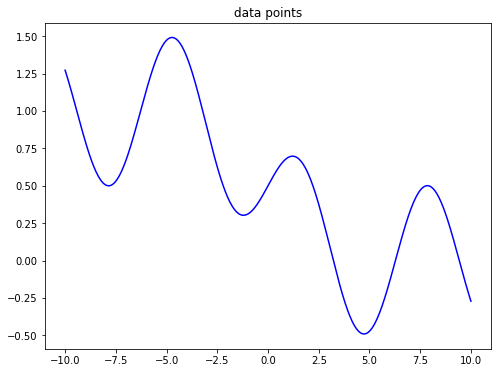

**************************************************
## [RESULT 02]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3538924762.py:25: RuntimeWarning: invalid value encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y))

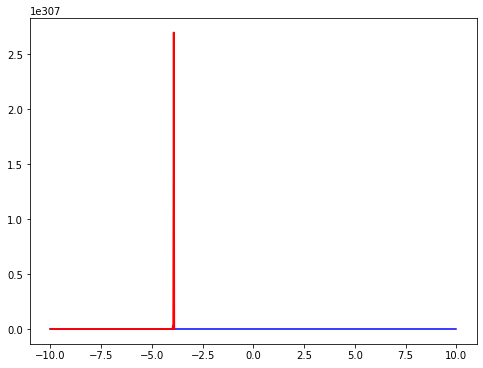

**************************************************
## [RESULT 03]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in power
  b[i] = np.sum(x**(i)*y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in multiply
  b[i] = np.sum(x*

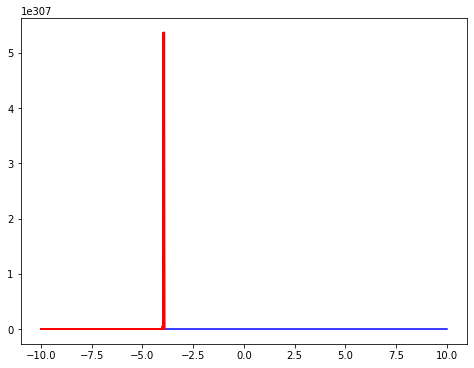

C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


**************************************************
## [RESULT 04]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in power
  b[i] = np.sum(x**(i)*y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in multiply
  b[i] = np.sum(x**(i)*y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3538924762.py:25: RuntimeWarning: overflow encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3538924762.py:25: RuntimeWarning: invalid value encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site

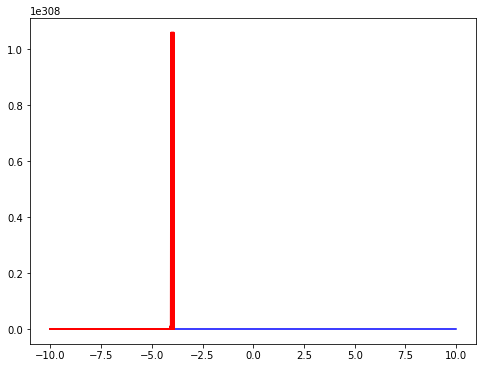

C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


**************************************************
## [RESULT 05]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3538924762.py:25: RuntimeWarning: overflow encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y))
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3538924762.py:25: RuntimeWarning: invalid value encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(

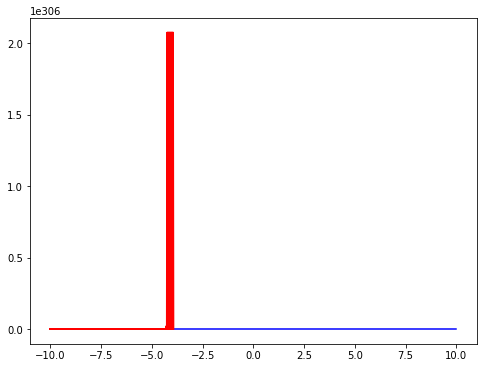

**************************************************
## [RESULT 06]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3538924762.py:25: RuntimeWarning: overflow encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y))
C:\U

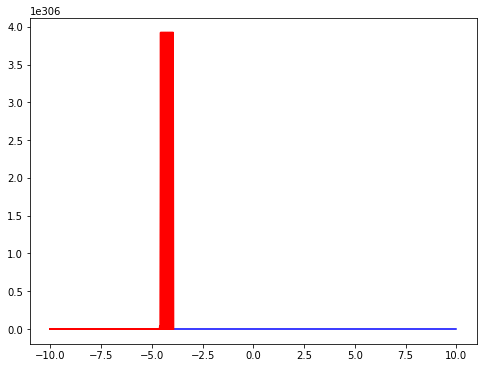

**************************************************
## [RESULT 07]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\561786162.py:27: RuntimeWarning: invalid value encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) 

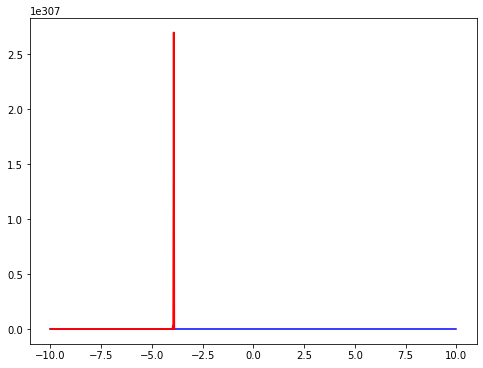

C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


**************************************************
## [RESULT 08]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in power
  b[i] = np.sum(x**(i)*y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in multiply
  b[i] = np.sum(x**(i)*y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\561786162.py:27: RuntimeWarning: overflow encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (alpha/2)*np.sum(z**2)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\561786162.py:27: RuntimeWarning: invalid value encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (alpha/2)*np.sum(z**2)


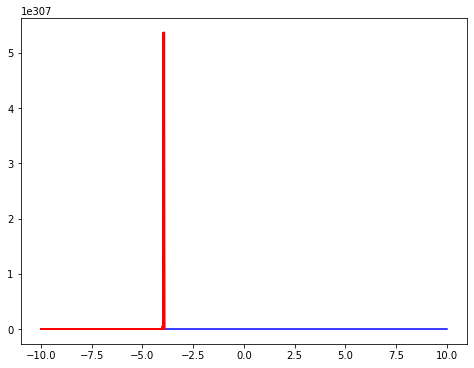

C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


**************************************************
## [RESULT 09]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in power
  b[i] = np.sum(x**(i)*y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in multiply
  b[i] = np.sum(x**(i)*y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\561786162.py:27: RuntimeWarning: overflow encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (alpha/2)*np.sum(z**2)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\561786162.py:27: RuntimeWarning: invalid value encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (alpha/2)*np.sum(z**2)
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n

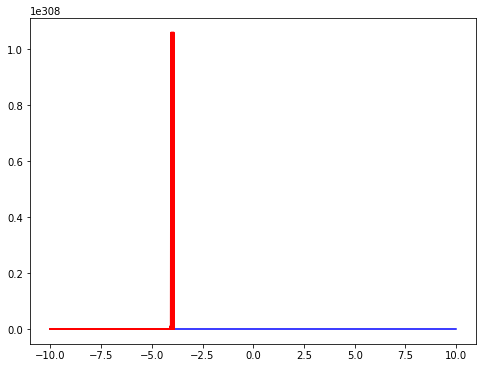

**************************************************
## [RESULT 10]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\561786162.py:27: RuntimeWarning: overflow encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (al

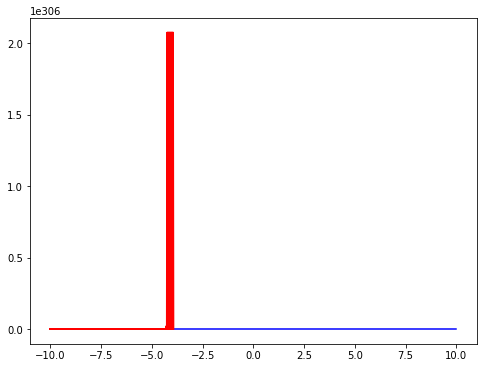

**************************************************
## [RESULT 11]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\561786162.py:27: RuntimeWarning: overflow encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (al

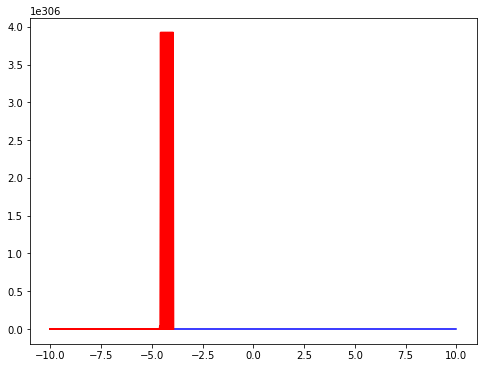

**************************************************
## [RESULT 12]
**************************************************


C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\1298071504.py:24: RuntimeWarning: overflow encountered in power
  A[i,j] = np.sum(x**(i+j))
C:\Users\TaeKyung Kim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in power
  b[i] = np.sum(x**(i)*y)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\3528388051.py:15: RuntimeWarning: overflow encountered in multiply
  b[i] = np.sum(x*

loss =  [[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
**************************************************
## [RESULT 13]
**************************************************
loss =  [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan

C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\561786162.py:27: RuntimeWarning: overflow encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (alpha/2)*np.sum(z**2)
C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_6156\561786162.py:27: RuntimeWarning: invalid value encountered in matmul
  loss = np.matmul((np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)).T, (np.matmul(construct_matrix_A(x,p), z) - construct_vector_b(y)))/(2*len(y)) + (alpha/2)*np.sum(z**2)


loss =  [[nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]
 [nan nan nan nan]]
**************************************************
## [RESULT 15]
**************************************************
loss =  [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan

In [1671]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)